In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\Student_Prediction_Model\collegePlace.csv',encoding='unicode_escape')

In [3]:
df.shape

(2966, 8)

In [4]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [5]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [7]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6420\3906169380.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male':1,'Female':0},inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6420\3906169380.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace(

In [8]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1,1
1,21,0,Computer Science,0,7,1,1,1
2,22,0,Information Technology,1,6,0,0,1
3,21,1,Information Technology,0,8,0,1,1
4,22,1,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,Information Technology,0,7,0,0,0
2962,23,1,Mechanical,1,7,1,0,0
2963,22,1,Information Technology,1,7,0,0,0
2964,22,1,Computer Science,1,7,0,0,0


In [9]:
df['Stream'].value_counts()

Stream
Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: count, dtype: int64

### Data Cleaning

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['Stream']=encoder.fit_transform(df['Stream'])

In [12]:
df['Stream'].unique()

array([3, 1, 4, 5, 2, 0])

In [13]:
df['Stream'].value_counts()

Stream
1    776
4    691
3    424
5    424
2    334
0    317
Name: count, dtype: int64

In [14]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,0
2962,23,1,5,1,7,1,0,0
2963,22,1,4,1,7,0,0,0
2964,22,1,1,1,7,0,0,0


### EDA

In [15]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [16]:
df['PlacedOrNot'].value_counts()

PlacedOrNot
1    1639
0    1327
Name: count, dtype: int64

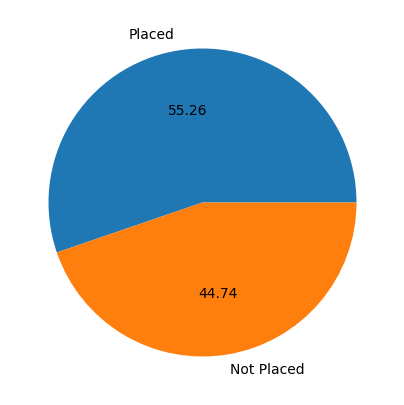

In [17]:
plt.figure(figsize=(5,5))
plt.pie(df['PlacedOrNot'].value_counts(),labels=['Placed','Not Placed'],autopct='%0.2f')
plt.show()

### Model Building

In [18]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [19]:
X.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,3,1,8,1,1
1,21,0,1,0,7,1,1
2,22,0,4,1,6,0,0
3,21,1,4,0,8,0,1
4,22,1,5,0,8,1,0


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: PlacedOrNot, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [23]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2,algorithm='SAMME')
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [24]:
clfs={
    'SVC':svc,
    'KNC':knc,
    'MNB':mnb,
    'DTC':dtc,
    'LRC':lrc,
    'RFC':rfc,
    'ABC':abc,
    'ETC':etc
}

In [25]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [26]:
train_classifier(svc,X_train,X_test,y_train,y_test)

(0.5269360269360269, 0.5269360269360269)

In [27]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():

    current_accuracy,current_precision=train_classifier(clf,X_train,X_test,y_train,y_test)

    print("for ",name)
    print("Accuracy -",current_accuracy)
    print("Precision -",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  SVC
Accuracy - 0.5269360269360269
Precision - 0.5269360269360269
for  KNC
Accuracy - 0.8501683501683501
Precision - 0.8783783783783784
for  MNB
Accuracy - 0.6262626262626263
Precision - 0.5982721382289417
for  DTC
Accuracy - 0.8888888888888888
Precision - 0.9920318725099602
for  LRC
Accuracy - 0.7491582491582491
Precision - 0.7411764705882353


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


for  RFC
Accuracy - 0.8686868686868687
Precision - 0.9065743944636678
for  ABC
Accuracy - 0.877104377104377
Precision - 0.925531914893617
for  ETC
Accuracy - 0.8619528619528619
Precision - 0.89419795221843


In [28]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [29]:
performance_df

,Algorithm,Accuracy,Precision
3,DTC,0.888889,0.992032
6,ABC,0.877104,0.925532
5,RFC,0.868687,0.906574
7,ETC,0.861953,0.894198
1,KNC,0.850168,0.878378
4,LRC,0.749158,0.741176
2,MNB,0.626263,0.598272
0,SVC,0.526936,0.526936


### Conclusion : So here the DecisionTreeClassifier wins the race in terms of Precision

In [30]:
import pickle
pickle.dump(lrc,open('model.pkl','wb'))